**DSCI 100 004 Project Proposal**: Predicting Artist Gender Using Artwork Size: Exploring Gender Discrimination in the Artistic Profession

Group 28

**Anneke Dresselhuis** - 60524006 | **Hesham El Kassem** - 37765682 | **Ariane Huang** - 94730660 | **Elaine Zhou** - 99976417

**Introduction** (Anneke)

Historical and contemporary artists have made and continue to make artwork using a variety of media including painting, drawing, sculpture, photography, printmaking and many more. Throughout history, however, socio-economic inequalties have made it difficult for women-identifying artists to work with certain types of media - particularly those which require a significant amount of space (Bain, 2006) which can be costly. Given that women's artwork was long categorized as smaller and less significant "arts and crafts" rather than grand masterpieces or "valuable art" made by men (Thomas, 2020), women artists have experienced and continue to experience disproportionate financial hardships. A recent art exhibition at Vancouver's Contemporary Art Gallery titled, "The Artist's Studio is Her Bedroom" alludes to the reality of spatial and financial constraints faced by many women artists today (Contemporary Art Gallery, 2020). 

Our data analysis uses the exhaustive database from New York's Museum of Modern Art to explore whether the gender of an artist (male or female) can be predicted by the size of the artwork. We note that gender in this dataset is understood to be of a binary class, although in real life gender is best understood as a existing on a spectrum. Currently, little emperical attention has been given to documenting discrimination in the artistic profession. The results from this analysis could be used to inform public funding iniatives that support women artists' access to studio space, improve their ability to create larger works and ultimately strengthen their financial security. 

Sources:

Bain, A. L. (2004). Female artistic identity in place: The studio. Social & Cultural Geography, 5(2), 171–193. https://doi.org/10.1080/14649360410001690204

The Artist’s Studio is Her Bedroom. (2020). Contemporary Art Gallery, Vancouver. Retrieved November 8, 2021, from https://www.contemporaryartgallery.ca/exhibitions/the-artists-studio-is-her-bedroom/

Thomas, Z. (2020). Introduction: The Arts and Crafts movement, work cultures, and the politics of gender. In Women art workers and the Arts and Crafts movement (1st ed., pp. 1–32). Manchester University Press. https://www.jstor.org/stable/j.ctv11g95mh.5


**Preliminary Exploratory Data Anlaysis** (Elaine, Ariane, Anneke)

First of all we loaded the libraries we need for the project.

In [1]:
library(tidyverse)
library(lubridate)
library(repr)
library(tidymodels)
library(GGally)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9   

We read the data from https://media.githubusercontent.com/media/MuseumofModernArt/collection/master/Artworks.csv" using `read_csv` function as the columns of the dataset is seperated by commas. 



In [2]:
#load dataset
artworks <- read_csv("https://media.githubusercontent.com/media/MuseumofModernArt/collection/master/Artworks.csv")

#explore a subset of the data: last 1000 entries
artworks_6 <- tail(artworks, 6)
artworks_6

Parsed with column specification:
cols(
  .default = col_character(),
  DateAcquired = col_date(format = ""),
  ObjectID = col_double(),
  `Circumference (cm)` = col_logical(),
  `Depth (cm)` = col_double(),
  `Diameter (cm)` = col_double(),
  `Height (cm)` = col_double(),
  `Length (cm)` = col_logical(),
  `Weight (kg)` = col_double(),
  `Width (cm)` = col_double(),
  `Seat Height (cm)` = col_logical(),
  `Duration (sec.)` = col_logical()
)

See spec(...) for full column specifications.

Warning message:
“2892 parsing failures.
 row         col           expected actual                                                                                         file
1002 Length (cm) 1/0/T/F/TRUE/FALSE  17.8  'https://media.githubusercontent.com/media/MuseumofModernArt/collection/master/Artworks.csv'
1003 Length (cm) 1/0/T/F/TRUE/FALSE  19.0  'https://media.githubusercontent.com/media/MuseumofModernArt/collection/master/Artworks.csv'
1004 Length (cm) 1/0/T/F/TRUE/FALSE  18.1  'https://media

Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,⋯,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<lgl>,<lgl>
"Silver Springs, FL",Unknown photographer,8595,NA,(),(0),(0),(),February 1903,Gelatin silver print,⋯,http://www.moma.org/media/W1siZiIsIjQ5MjcyMCJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2UiXV0.jpg?sha=8198120224d3f8dd,NA,NA,NA,8.80000,NA,NA,30.00000,NA,NA
Untitled,"Chesnutt Brothers Studio, Andrew Chesnutt, Lewis Chesnutt","133005, 133006, 133007","(American, 1861–1934) (American, 1860–1933)",() (American) (American),(0) (1861) (1860),(0) (1934) (1933),() (Male) (Male),c. 1890,Gelatin silver print,⋯,http://www.moma.org/media/W1siZiIsIjQ5MjcyMiJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2UiXV0.jpg?sha=868071c597640056,NA,NA,NA,10.79502,NA,NA,16.51003,NA,NA
Plate (folio 2 verso) from Muscheln und schirme (Shells and Umbrellas),Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),(1889),(1943),(Female),1939,One from an illustrated book with four line block reproductions,⋯,http://www.moma.org/media/W1siZiIsIjQ4NTExNSJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2UiXV0.jpg?sha=0850c50841bddd28,NA,NA,NA,13.50000,NA,NA,10.00000,NA,NA
Plate (folio 6) from Muscheln und schirme (Shells and Umbrellas),Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),(1889),(1943),(Female),1939,One from an illustrated book with four line block reproductions,⋯,http://www.moma.org/media/W1siZiIsIjQ4NTExOCJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2UiXV0.jpg?sha=70e2d5d8543da2a6,NA,NA,NA,13.50000,NA,NA,10.00000,NA,NA
Plate (folio 12) from Muscheln und schirme (Shells and Umbrellas),Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),(1889),(1943),(Female),1939,One from an illustrated book with four line block reproductions,⋯,http://www.moma.org/media/W1siZiIsIjQ4NTEyMCJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2UiXV0.jpg?sha=72d94323cdc79256,NA,NA,NA,11.00000,NA,NA,10.00000,NA,NA
Plate (folio 16) from Muscheln und schirme (Shells and Umbrellas),Sophie Taeuber-Arp,5777,"(Swiss, 1889–1943)",(Swiss),(1889),(1943),(Female),1939,One from an illustrated book with four line block reproductions,⋯,http://www.moma.org/media/W1siZiIsIjQ4NTEyMSJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2UiXV0.jpg?sha=6fed2330b797a1b8,NA,NA,NA,13.50000,NA,NA,10.00000,NA,NA


However, some column names of the dataset has to be revised. For example, the column Height (cm) will be considered as a function Height with argument cm in R. By renaming the column names using make.names function we are able to use them directly.

In [3]:
#tidy column names
colnames(artworks) <- make.names(colnames(artworks), unique = TRUE)
artworks

Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,⋯,ThumbnailURL,Circumference..cm.,Depth..cm.,Diameter..cm.,Height..cm.,Length..cm.,Weight..kg.,Width..cm.,Seat.Height..cm.,Duration..sec..
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<lgl>,<lgl>
"Ferdinandsbrücke Project, Vienna, Austria (Elevation, preliminary version)",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1896,Ink and cut-and-pasted painted pages on paper,⋯,http://www.moma.org/media/W1siZiIsIjU5NDA1Il0sWyJwIiwiY29udmVydCIsIi1yZXNpemUgMzAweDMwMFx1MDAzZSJdXQ.jpg?sha=137b8455b1ec6167,NA,NA,NA,48.6000,NA,NA,168.9000,NA,NA
"City of Music, National Superior Conservatory of Music and Dance, Paris, France, View from interior courtyard",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(Male),1987,Paint and colored pencil on print,⋯,http://www.moma.org/media/W1siZiIsIjk3Il0sWyJwIiwiY29udmVydCIsIi1yZXNpemUgMzAweDMwMFx1MDAzZSJdXQ.jpg?sha=55b65fa4368fe00a,NA,NA,NA,40.6401,NA,NA,29.8451,NA,NA
"Villa near Vienna Project, Outside Vienna, Austria, Elevation",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, pen, color pencil, ink, and gouache on tracing paper",⋯,http://www.moma.org/media/W1siZiIsIjk4Il0sWyJwIiwiY29udmVydCIsIi1yZXNpemUgMzAweDMwMFx1MDAzZSJdXQ.jpg?sha=fdcfca4db3acac1f,NA,NA,NA,34.3000,NA,NA,31.8000,NA,NA
"The Manhattan Transcripts Project, New York, New York, Introductory panel to Episode 1: The Park",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1980,Photographic reproduction with colored synthetic laminate,⋯,http://www.moma.org/media/W1siZiIsIjEyNCJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2UiXV0.jpg?sha=c89b9071486760a5,NA,NA,NA,50.8000,NA,NA,50.8000,NA,NA
"Villa, project, outside Vienna, Austria, Exterior perspective",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, color pencil, ink, and gouache on tracing paper",⋯,http://www.moma.org/media/W1siZiIsIjEyNiJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2UiXV0.jpg?sha=b21f3d10def77da9,NA,NA,NA,38.4000,NA,NA,19.1000,NA,NA
"The Manhattan Transcripts Project, New York, New York, Episode 1: The Park",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1976-77,Gelatin silver photograph,⋯,http://www.moma.org/media/W1siZiIsIjE0OCJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2UiXV0.jpg?sha=66fd4135e60693d0,NA,NA,NA,35.6000,NA,NA,45.7000,NA,NA
"The Manhattan Transcripts Project, New York, New York, Episode 1: The Park",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1976-77,Gelatin silver photographs,⋯,http://www.moma.org/media/W1siZiIsIjE0OSJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2UiXV0.jpg?sha=e57fc281da1e6a83,NA,NA,NA,35.6000,NA,NA,45.7000,NA,NA
"The Manhattan Transcripts Project, New York, New York, Episode 1: The Park",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1976-77,Gelatin silver photograph,⋯,http://www.moma.org/media/W1siZiIsIjE0OSJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2UiXV0.jpg?sha=e57fc281da1e6a83,NA,NA,NA,35.6000,NA,NA,45.7000,NA,NA
"The Manhattan Transcripts Project, New York, New York, Episode 1: The Park",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1976-77,Gelatin silver photograph,⋯,http://www.moma.org/media/W1siZiIsIjE1MCJdLFsicCIsImNvbnZlcnQiLCItcmVzaXplIDMwMHgzMDBcdTAwM2UiXV0.jpg?sha=c63ba008a6d5b139,NA,NA,NA,35.6000,NA,NA,45.7000,NA,NA


We first have to split our data into a training set and a testing set. We will only use the training set to plot graph. Width and Height are the two predictors we want to use to predict the artists' gender. By doing `filter(Gender == "(Male)")` and `filter(Gender == "(Female)")` we successfully separated our data into two subsets by genders. Since the data is untidy and there are 409 levels of Genders, the best option was to filter out (Male) and (Female) since extracting all the genders would be extremely computationally expensive especially for our time frame.

In [29]:
# create table of gender and surface area (Area)
#is Area in cm^2? We should include units
artworks_split <- initial_split(artworks, prop = 0.75, strat = Gender)
artworks_training <- training(artworks_split)
artworks_testing <- testing(artworks_split)

artworks_selected <- artworks_training %>%
                     select(Height..cm., Width..cm., Gender)


artworks_male <- artworks_selected %>%
                        filter(Gender == "(Male)") %>%
                        filter(Height..cm. != "NA") %>%
                        filter(Width..cm. != "NA") 
                        

artworks_female <- artworks_selected %>%
                   filter(Gender == "(Female)") %>%
                   filter(Height..cm. != "NA") %>%
                   filter(Width..cm. != "NA")

artworks_male <- sample_n(artworks_male, 1200)
artworks_female <- sample_n(artworks_female, 1200)

artworks_both <- rbind(artworks_male, artworks_female)
artworks_both <- sample_n(artworks_both, 1200) %>%
                 filter(Height..cm. != "NA") %>%
                 filter(Width..cm. != "NA")
artworks_both
artworks_male
artworks_female 

nrow(artworks_male)
nrow(artworks_female)
nrow(artworks_both)

Height..cm.,Width..cm.,Gender
<dbl>,<dbl>,<chr>
47.800000,47.00000,(Male)
91.300000,122.00000,(Male)
20.000000,17.10000,(Female)
54.610109,56.19761,(Female)
7.620015,12.70003,(Female)
21.600000,27.20000,(Male)
25.400000,33.50000,(Male)
141.700000,27.50000,(Female)
53.300000,82.20000,(Male)


Height..cm.,Width..cm.,Gender
<dbl>,<dbl>,<chr>
108.30000,142.50000,(Male)
27.30000,23.30000,(Male)
20.95504,29.21006,(Male)
48.90000,48.90000,(Male)
38.00000,38.40000,(Male)
96.52019,152.40030,(Male)
58.42010,89.05890,(Male)
44.80000,50.50000,(Male)
24.70000,13.80000,(Male)


Height..cm.,Width..cm.,Gender
<dbl>,<dbl>,<chr>
29.30000,23.20000,(Female)
18.90000,12.70000,(Female)
29.20000,24.10000,(Female)
105.80000,83.30000,(Female)
4.00000,8.70000,(Female)
24.10000,34.90000,(Female)
65.20000,50.00000,(Female)
47.70000,33.90000,(Female)
21.00000,12.70000,(Female)


[1] 1200

[1] 1200

[1] 1200

In [30]:
summary(artworks_training)

    Title              Artist          ConstituentID       ArtistBio        
 Length:103614      Length:103614      Length:103614      Length:103614     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 Nationality         BeginDate           EndDate             Gender         
 Length:103614      Length:103614      Length:103614      Length:103614     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            

In order to prove gender can affect sizes of artworks, we have to show differences in artworks' height and width produced by artists in diffent gender. We generated two plots.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



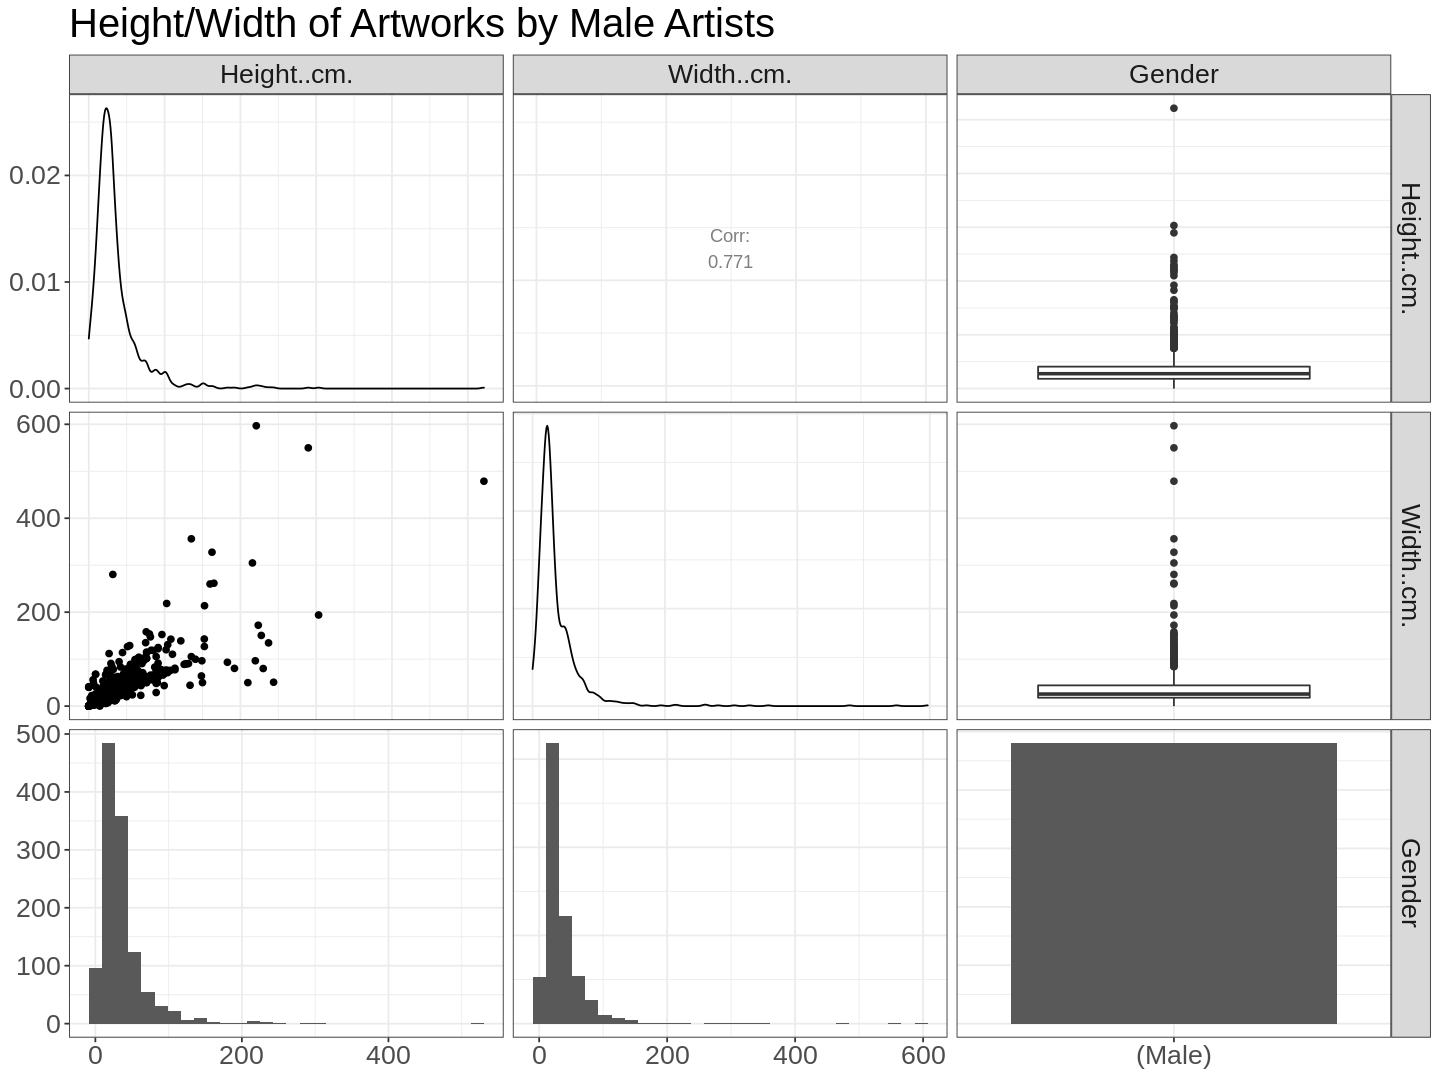

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



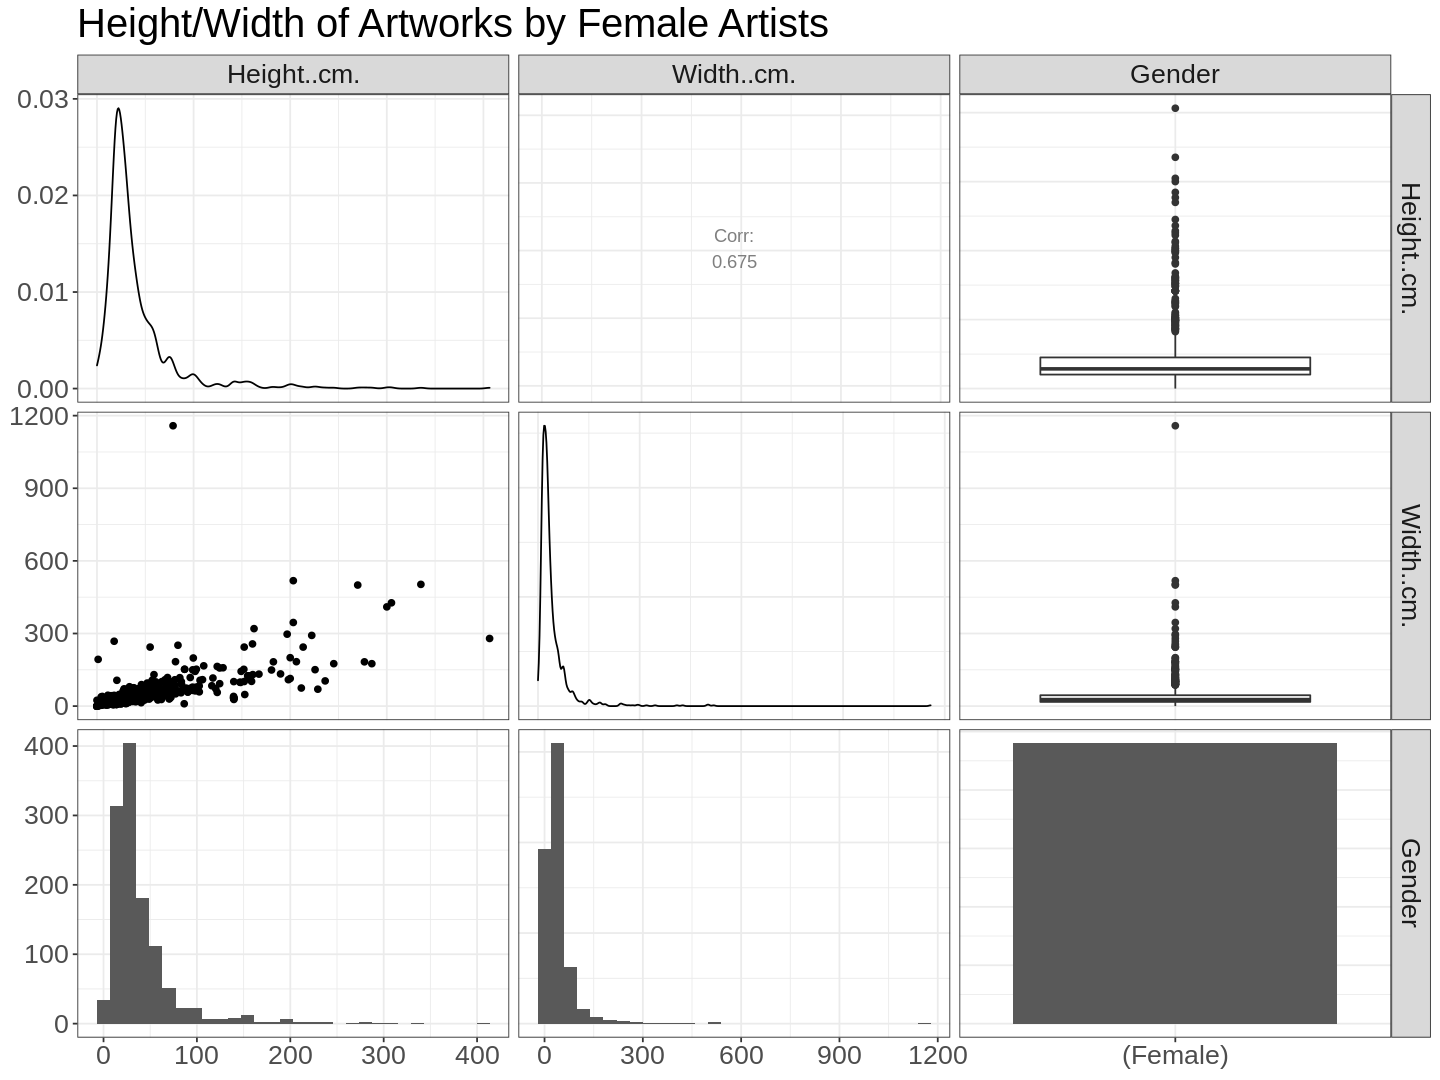

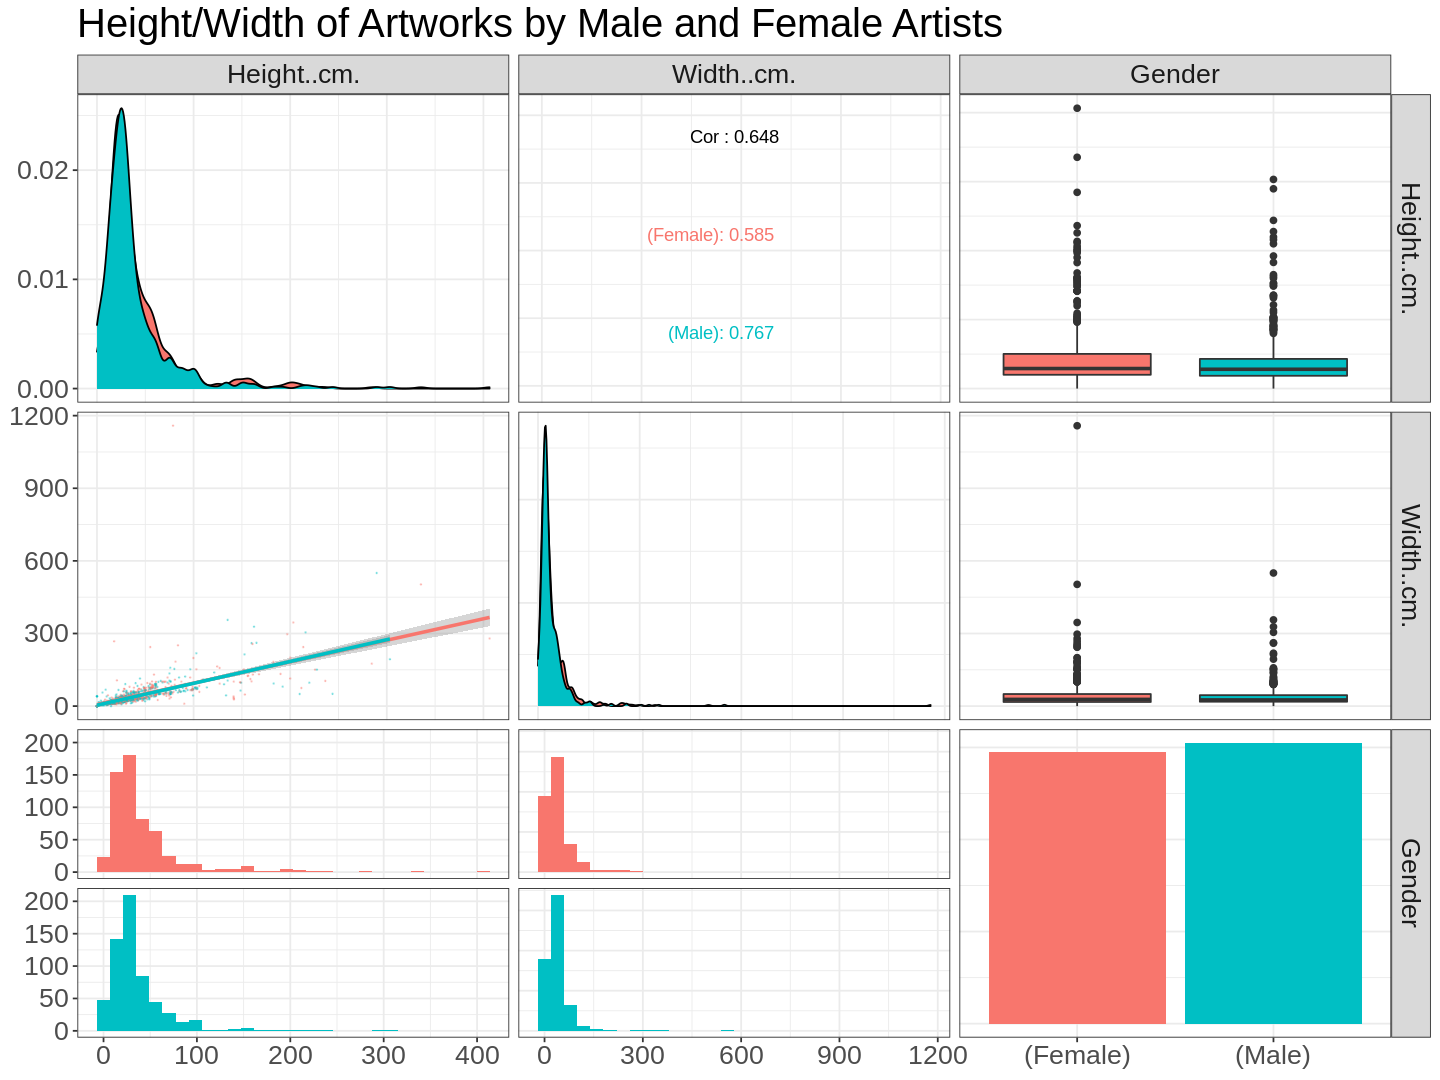

In [31]:
options(repr.plot.width = 12, repr.plot.height = 9) 
male_art_plot <- artworks_male %>%
                 ggpairs(title = "Height/Width of Artworks by Male Artists")  +
                 theme_bw() +
                 theme(text = element_text(size = 20))
                 
male_art_plot

female_art_plot <- artworks_female %>%
                   ggpairs(title = "Height/Width of Artworks by Female Artists")  +
                   theme_bw() +
                   theme(text = element_text(size = 20))
                   
female_art_plot

male_and_female_plot <- artworks_both %>%
                   ggpairs(title = "Height/Width of Artworks by Male and Female Artists", 
               mapping = ggplot2::aes(colour=Gender), 
               lower = list(continuous = wrap("smooth", alpha = 0.3, size=0.1)))  +
                   theme_bw() +
                   theme(text = element_text(size = 20))
male_and_female_plot

For the width of artworks, there is one outlier for female artists.

In [33]:
artworks_width_revised <- arrange(artworks_both, Width..cm.) %>%
                          slice(1:(n()-1))
artworks_width_revised

Height..cm.,Width..cm.,Gender
<dbl>,<dbl>,<chr>
0.00000,0.0,(Female)
0.00000,0.0,(Male)
0.00000,0.0,(Female)
0.00000,0.0,(Female)
0.00000,0.0,(Male)
0.00000,0.0,(Male)
0.00000,0.0,(Male)
0.00000,0.0,(Male)
0.00000,0.0,(Male)


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



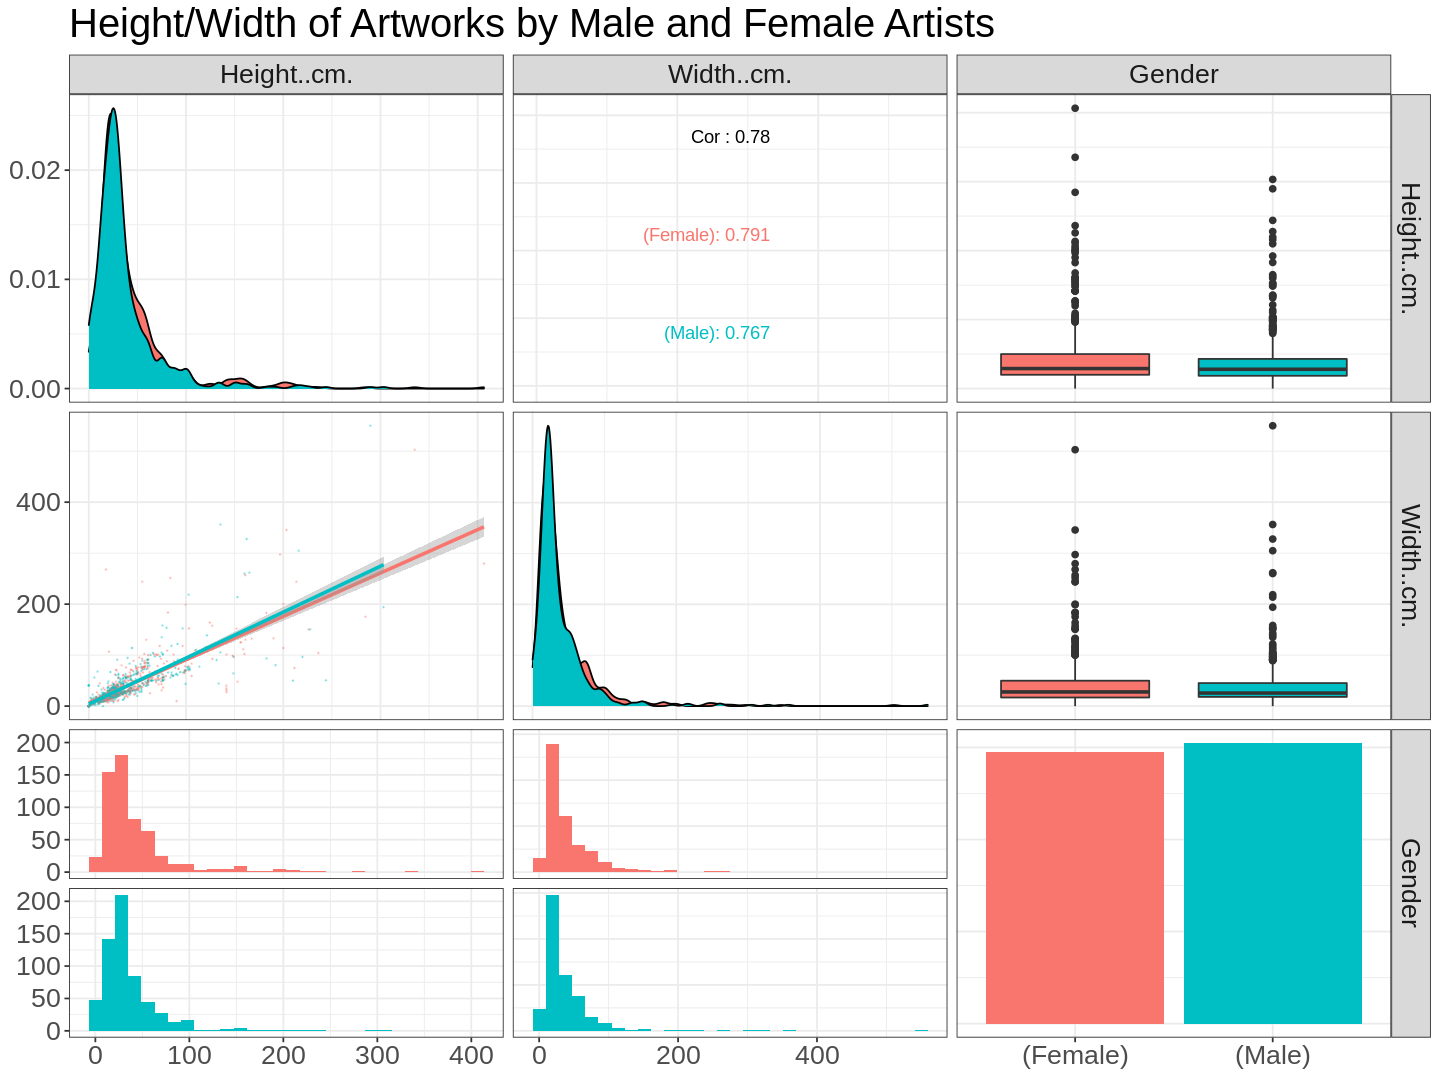

In [34]:
gender_plot_revised <- artworks_width_revised %>%
                   ggpairs(title = "Height/Width of Artworks by Male and Female Artists", 
                   mapping = ggplot2::aes(colour=Gender), 
                   lower = list(continuous = wrap("smooth", alpha = 0.3, size=0.1)))  +
                   theme_bw() +
                   theme(text = element_text(size = 20))
gender_plot_revised

After removing the outlier, the average width of artworks created by male artists are higher than that of female artists.
For the height of artworks, when the height of artpieces is not large, artists in both genders have relatively similar proportion. However, for artworks with large height, their artists are tend to be female.

**Methods** (Hesham)

We will use a "K" nearest neighbours analysis to classify the gender of the artists in this data set using the predictors Height and Width. In order to find the optimized value for “K”, we will conduct a cross validation using `vfold_cv()`.

We have already split the data, allocating 75% for training and 25% for testing. To continue our analysis we will create our recipe where we will specify Gender as our target and Height and Width as our predictors using the training data set. 

To create our "K" nearest neighbours classifier, we will compute the "K" nearest straight-line distances using the `"rectangular"` weight function, set the neighbours to `tune()`, set the engine as `"kknn"` using `"classification"` mode. 

Next we will train the classifier using the `workflow()` function in which we will bring together the recipe and model, and input the result of our cross validation into the `fit_resamples` function.  We will then `collect_metrics()` on our classifier to evaluate how well it performed.

Finally we will use the `predict()` function to apply our classifier to the testing data. Using `bind_cols()` we will be able to view the predictions in our testing data. 


**Expected Outcomes and Significance** (All)

We anticipate that our analysis will empirically verify what has colloquiually been identified as a differential between artwork sizes by male and female artists. According to our current understanding and logic, observations with larger values for height and width will most likely be predicted as Male and observations with smaller values for height and width will most likely be predicted as Female.